In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [35]:
Plot_dataframe = pd.DataFrame()

In [12]:
column_names= ['date','hour','open','high','low','close','volume']
Dataset = pd.read_csv('eurusd-15m.csv',delimiter = ';',names =column_names)
Dataset

,date,hour,open,high,low,close,volume
0,21/10/2002,01:15:00,0.97320,0.97340,0.97260,0.97260,0
1,21/10/2002,01:30:00,0.97260,0.97275,0.97195,0.97205,0
2,21/10/2002,01:45:00,0.97215,0.97235,0.97195,0.97210,0
3,21/10/2002,02:00:00,0.97200,0.97260,0.97190,0.97240,0
4,21/10/2002,02:15:00,0.97235,0.97250,0.97220,0.97225,0
...,...,...,...,...,...,...,...
533057,26/10/2023,18:30:00,1.05640,1.05656,1.05636,1.05638,1426
533058,26/10/2023,18:45:00,1.05639,1.05655,1.05627,1.05640,1114
533059,26/10/2023,19:00:00,1.05640,1.05644,1.05575,1.05575,1804
533060,26/10/2023,19:15:00,1.05575,1.05612,1.05575,1.05598,1488


In [13]:
Dataset['Time'] = Dataset['date'].astype(str) + ' ' + Dataset['hour'].astype(str)
Dataset.set_index('Time',inplace = True)
Dataset

,date,hour,open,high,low,close,volume
Time,,,,,,,
21/10/2002 01:15:00,21/10/2002,01:15:00,0.97320,0.97340,0.97260,0.97260,0
21/10/2002 01:30:00,21/10/2002,01:30:00,0.97260,0.97275,0.97195,0.97205,0
21/10/2002 01:45:00,21/10/2002,01:45:00,0.97215,0.97235,0.97195,0.97210,0
21/10/2002 02:00:00,21/10/2002,02:00:00,0.97200,0.97260,0.97190,0.97240,0
21/10/2002 02:15:00,21/10/2002,02:15:00,0.97235,0.97250,0.97220,0.97225,0
...,...,...,...,...,...,...,...
26/10/2023 18:30:00,26/10/2023,18:30:00,1.05640,1.05656,1.05636,1.05638,1426
26/10/2023 18:45:00,26/10/2023,18:45:00,1.05639,1.05655,1.05627,1.05640,1114
26/10/2023 19:00:00,26/10/2023,19:00:00,1.05640,1.05644,1.05575,1.05575,1804


In [14]:
df = Dataset.drop(['date','hour','volume'],axis = 1)
df

,open,high,low,close
Time,,,,
21/10/2002 01:15:00,0.97320,0.97340,0.97260,0.97260
21/10/2002 01:30:00,0.97260,0.97275,0.97195,0.97205
21/10/2002 01:45:00,0.97215,0.97235,0.97195,0.97210
21/10/2002 02:00:00,0.97200,0.97260,0.97190,0.97240
21/10/2002 02:15:00,0.97235,0.97250,0.97220,0.97225
...,...,...,...,...
26/10/2023 18:30:00,1.05640,1.05656,1.05636,1.05638
26/10/2023 18:45:00,1.05639,1.05655,1.05627,1.05640
26/10/2023 19:00:00,1.05640,1.05644,1.05575,1.05575


In [50]:
train = df[ :-20]
test = df[-20 : ]

In [51]:
train

,open,high,low,close
Time,,,,
21/10/2002 01:15:00,0.97320,0.97340,0.97260,0.97260
21/10/2002 01:30:00,0.97260,0.97275,0.97195,0.97205
21/10/2002 01:45:00,0.97215,0.97235,0.97195,0.97210
21/10/2002 02:00:00,0.97200,0.97260,0.97190,0.97240
21/10/2002 02:15:00,0.97235,0.97250,0.97220,0.97225
...,...,...,...,...
26/10/2023 13:30:00,1.05579,1.05647,1.05576,1.05632
26/10/2023 13:45:00,1.05632,1.05636,1.05600,1.05610
26/10/2023 14:00:00,1.05610,1.05633,1.05559,1.05559


In [17]:
test

,open,high,low,close
Time,,,,
26/10/2023 14:45:00,1.05497,1.05583,1.05494,1.05568
26/10/2023 15:00:00,1.05567,1.05585,1.05552,1.05572
26/10/2023 15:15:00,1.05572,1.05626,1.05568,1.05614
26/10/2023 15:30:00,1.05615,1.05618,1.05578,1.05587
26/10/2023 15:45:00,1.05587,1.05644,1.05585,1.05625
26/10/2023 16:00:00,1.05624,1.05627,1.05589,1.05593
26/10/2023 16:15:00,1.05593,1.05609,1.05591,1.05609
26/10/2023 16:30:00,1.05609,1.05626,1.05607,1.05616
26/10/2023 16:45:00,1.05616,1.05618,1.05605,1.05613


# holt winter model

In [9]:
hw = ExponentialSmoothing(train['close'],
                          initialization_method='legacy-heuristic',
                          trend ='add',
                          seasonal = 'add',
                          seasonal_periods = 92)
res_hw = hw.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [10]:
holt_winter_predictions = res_hw.forecast(20)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [19]:
holt_winter_predictions

533042    1.055060
533043    1.055123
533044    1.055218
533045    1.055277
533046    1.055342
533047    1.055397
533048    1.055516
533049    1.055604
533050    1.055594
533051    1.055721
533052    1.055821
533053    1.055871
533054    1.055951
533055    1.055954
533056    1.055996
533057    1.055973
533058    1.055954
533059    1.055930
533060    1.055951
533061    1.055827
dtype: float64

In [42]:
test['close'].values

array([1.05568, 1.05572, 1.05614, 1.05587, 1.05625, 1.05593, 1.05609,
       1.05616, 1.05613, 1.05634, 1.05632, 1.05646, 1.05647, 1.05643,
       1.0564 , 1.05638, 1.0564 , 1.05575, 1.05598, 1.05594])

In [22]:
mse_holt = mean_squared_error(test['close'],holt_winter_predictions)
rmse_holt = np.sqrt(mse_holt)
rmse_holt

0.0005488249976106041

In [45]:
Plot_dataframe


""


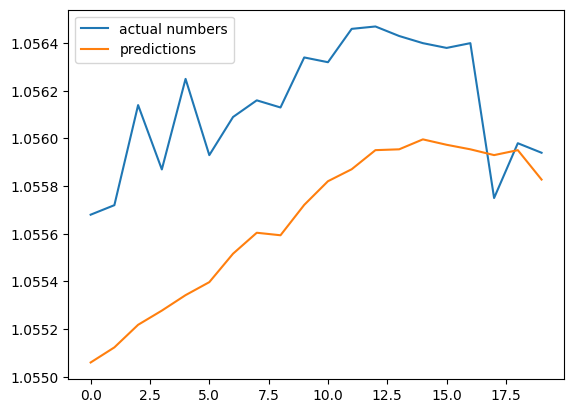

In [48]:
plt.plot(test['close'].values, label = 'actual numbers')
plt.plot(holt_winter_predictions.values , label = 'predictions')
plt.legend()

# ARIMA

In [53]:
arima = ARIMA(train['close'],order = (1,1,1))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [54]:
arima_result = arima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [57]:
arima_predictions = arima_result.predict()

In [58]:
arima_predictions

Time
21/10/2002 01:15:00    0.000000
21/10/2002 01:30:00    0.972600
21/10/2002 01:45:00    0.972070
21/10/2002 02:00:00    0.972097
21/10/2002 02:15:00    0.972389
                         ...   
26/10/2023 13:30:00    1.055778
26/10/2023 13:45:00    1.056302
26/10/2023 14:00:00    1.056109
26/10/2023 14:15:00    1.055608
26/10/2023 14:30:00    1.055445
Name: predicted_mean, Length: 533042, dtype: float64

In [65]:
arima_forecast = arima_result.get_forecast(20)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [66]:
arima_forecast = arima_forecast.predicted_mean
arima_forecast

533042    1.054987
533043    1.054985
533044    1.054985
533045    1.054985
533046    1.054985
533047    1.054985
533048    1.054985
533049    1.054985
533050    1.054985
533051    1.054985
533052    1.054985
533053    1.054985
533054    1.054985
533055    1.054985
533056    1.054985
533057    1.054985
533058    1.054985
533059    1.054985
533060    1.054985
533061    1.054985
Name: predicted_mean, dtype: float64

In [67]:
mse_arima = mean_squared_error(test['close'],arima_forecast)
rmse_arima = np.sqrt(mse_arima)
rmse_arima

0.0011842383528025224

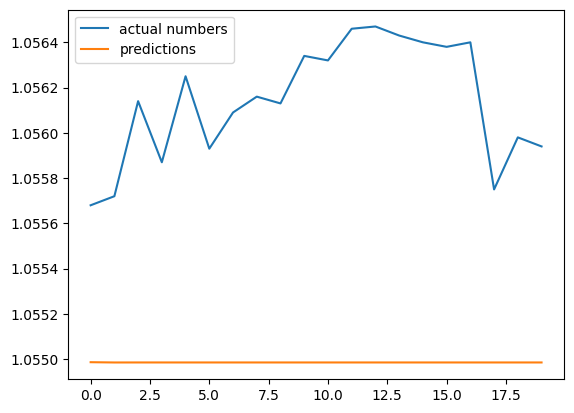

In [72]:
plt.plot(test['close'].values, label = 'actual numbers')
plt.plot(arima_forecast.values , label = 'predictions')
plt.legend()